In [1]:
%matplotlib inline
import pylab
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import cm as cm
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, cross_validate,cross_val_score
from scipy.stats import lognorm, kurtosis, skew, probplot, kstest, ttest_ind,f_oneway
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import warnings
from sklearn.preprocessing import OneHotEncoder
import math


from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt # module for plotting 
from matplotlib import interactive, font_manager
from matplotlib import rcParams
import matplotlib.cm as cm
import matplotlib as mpl
from matplotlib.colors import ListedColormap

warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
dark2_colors = [(0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843),
                (0.10588235294117647, 0.6196078431372549, 0.4666666666666667),
                (0.8509803921568627, 0.37254901960784315, 0.00784313725490196),
                (0.4588235294117647, 0.4392156862745098, 0.7019607843137254),
                (0.9058823529411765, 0.1607843137254902, 0.5411764705882353),
                (0.4, 0.6509803921568628, 0.11764705882352941),
                (0.9019607843137255, 0.6705882352941176, 0.00784313725490196),
                (0.6509803921568628, 0.4627450980392157, 0.11372549019607843)]

cmap_set1 = ListedColormap(['#4daf4a', '#377eb8', '#e41a1c' ])
dark2_cmap=ListedColormap(dark2_colors)



def set_mpl_params():
    rcParams['figure.figsize'] = (10, 6)
    rcParams['figure.dpi'] = 150

    rcParams['lines.linewidth'] = 2
    rcParams['axes.facecolor'] = 'white'
    rcParams['font.size'] = 16
    rcParams['patch.edgecolor'] = 'white'
    rcParams['patch.facecolor'] = dark2_colors[0]
    rcParams['font.family'] = 'StixGeneral'

set_mpl_params()



        
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

In [3]:
# data location
localpath = ''
localpath = 'C://Users//Shaghayegh.kazemlou//Shay//Danaher//Microbiology//Data//'
filepath = 'C://Users//Shaghayegh.kazemlou//Shay//Danaher//Microbiology//Files//'

In [4]:
neg00=pd.read_csv(localpath+"All_neg.csv")
neg00.head()

C:\Users\Shaghayegh.kazemlou\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (3,17,293,294) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trackingID,testdate,SampleID,ID,strains,Org_Group,Organism_ID,anti,Drug,drug_index,drug_combine,Frzpanel,Drypanel,LPDG_MIC_2F,LPDG_DSI_2F,LPDG_MIC_2M,LPDG_DSI_2M,conc,Concentration,conc_No,wellbias,G_or_I,AreaSUM_Cycle_2,AreaSUM_Cycle_3,AreaSUM_Cycle_4,AreaSUM_Cycle_5,AreaSUM_Cycle_6,AreaSUM_Cycle_7,AreaSUM_Cycle_8,AreaSUM_Cycle_9,AreaSUM_Cycle_10,AreaSUM_Cycle_11,AreaSUM_Cycle_12,AreaSUM_Cycle_13,AreaSUM_Cycle_14,AreaSUM_Cycle_15,PerimMean_Cycle_2,PerimMean_Cycle_3,PerimMean_Cycle_4,PerimMean_Cycle_5,PerimMean_Cycle_6,PerimMean_Cycle_7,PerimMean_Cycle_8,PerimMean_Cycle_9,PerimMean_Cycle_10,PerimMean_Cycle_11,PerimMean_Cycle_12,PerimMean_Cycle_13,PerimMean_Cycle_14,PerimMean_Cycle_15,...,Rate_BacCount_Cy7vsCy6,Rate_BacCount_Cy8vsCy7,Rate_BacCount_Cy9vsCy8,Rate_BacCount_Cy10vsCy9,Rate_BacCount_Cy11vsCy10,Rate_BacCount_Cy12vsCy11,Rate_BacCount_Cy13vsCy12,Rate_BacCount_Cy14vsCy13,Rate_BacCount_Cy15vsCy14,Rate_Area_GvsD_Cy4,Rate_Area_GvsD_Cy5,Rate_Area_GvsD_Cy6,Rate_Area_GvsD_Cy7,Rate_Area_GvsD_Cy8,Rate_Area_GvsD_Cy9,Rate_Area_GvsD_Cy10,Rate_Area_GvsD_Cy11,Rate_Area_GvsD_Cy12,Rate_Area_GvsD_Cy13,Rate_Area_GvsD_Cy14,Rate_BacCount_GvsD_Cy2,Rate_BacCount_GvsD_Cy3,Rate_BacCount_GvsD_Cy4,Rate_BacCount_GvsD_Cy5,Rate_BacCount_GvsD_Cy6,Rate_BacCount_GvsD_Cy7,Rate_BacCount_GvsD_Cy8,Rate_BacCount_GvsD_Cy9,Rate_BacCount_GvsD_Cy10,Rate_BacCount_GvsD_Cy11,Rate_BacCount_GvsD_Cy12,Rate_BacCount_GvsD_Cy13,Rate_BacCount_GvsD_Cy14,Rate_Area_BacCount_Cy2,Rate_Area_BacCount_Cy3,Rate_Area_BacCount_Cy4,Rate_Area_BacCount_Cy5,Rate_Area_BacCount_Cy6,Rate_Area_BacCount_Cy7,Rate_Area_BacCount_Cy8,Rate_Area_BacCount_Cy9,Rate_Area_BacCount_Cy10,Rate_Area_BacCount_Cy11,Rate_Area_BacCount_Cy12,Rate_Area_BacCount_Cy13,Rate_Area_BacCount_Cy14,Dry_Growth_Pattern,Dry_Growth_Strength,drugcode,GI
0,0,20180724,10_50241,50241,A.BAUMANNII,NEG,71,AS,Ampicillin/Sulbactam,1,b,JFSN2F,JFSN2D,16/8,6,16/8,6,0.5/0.25,0.5,1,-5,G,27101.894,30706.331,40497.462,72978.205,187658.465,430169.064,529126.616,561254.217,576701.647,582257.974,586606.079,588559.637,589819.637,590280.383,14.906538,15.423570,16.556296,20.460558,36.782275,84.683908,306.629000,1354.753000,3633.388000,3502.197000,3365.422000,3290.571000,3235.660000,3281.725000,...,1.200924,0.359217,0.168168,0.092888,0.072765,0.079667,0.076544,0.040091,0.042534,0.960319,0.957059,0.966725,0.982470,1.017562,1.009941,1.012928,1.008266,1.005656,1.002860,1.002949,0.781731,0.780822,0.875166,0.974426,1.076084,1.183281,1.290316,1.237691,1.250949,1.251715,1.220727,1.176770,1.173738,7.196467,7.647903,10.756298,15.951520,24.077299,25.076895,22.693713,20.606316,19.373859,18.233739,17.014418,15.857302,15.278718,NaN,NaN,AS,1
1,1,20180724,10_50241,50241,A.BAUMANNII,NEG,71,AS,Ampicillin/Sulbactam,1,b,JFSN2F,JFSN2D,16/8,6,16/8,6,1/0.5,1.0,2,-4,G,21542.829,26216.352,35438.045,76848.397,210919.649,424311.600,525144.989,565128.127,580313.343,584653.949,586999.457,589276.882,590874.199,592408.908,15.326497,15.681645,17.124328,24.154123,53.129892,142.425321,462.888231,813.777200,3614.894000,3346.861000,3347.768000,3324.871000,3307.702000,3272.671000,...,0.988239,0.401552,0.179621,0.175921,0.104793,0.069173,0.073629,0.065962,0.093654,1.097422,0.908860,0.860110,0.996032,1.025278,1.003018,1.006624,1.004134,1.004982,1.001639,1.001159,1.378923,1.331210,1.195573,1.162754,1.281045,1.559345,1.649035,1.566423,1.471411,1.429629,1.407922,1.360909,1.324457,10.090318,11.132209,12.858507,20.043922,32.216229,32.596727,28.784531,26.259380,22.930942,20.911118,19.636686,18.360967,17.271468,NaN,NaN,AS,1
2,2,20180724,10_50241,50241,A.BAUMANNII,NEG,71,AS,Ampicillin/Sulbactam,1,b,JFSN2F,JFSN2D,16/8,6,16/8,6,2020-02-01 00:00:00,2.0,3,-3,G,9492.367,21206.577,32263.642,75590.197,174958.406,293052.680,403847.022,500362.903,555413.776,574628.231,583394.307,579776.302,589994.365,591729.275,18.712269,15.354304,17.419314,27.283791,53.273801,121.420147,93.508771,168.450500,746.132333,1859.729500,3487.894000,3446.500000,3279.092000,3250.854000,...,0.366804,0.441463,0.427158,0.317

In [5]:
neg = neg00.copy()
neg['bug_drug']=neg.apply(lambda row:  str(row['SampleID'])+'_'
                              +str(row['testdate'])+'_'+str(row['drug_index']), axis=1)
neg['strain'] = neg['strains']
neg['conc'] = neg['Concentration']
neg.sort_values(by =['ID','drug_index','Concentration'], axis=0, ascending=True, inplace=True)
neg.loc[:,['testdate','trackingID','bug_drug', 'ID','drug_index','Concentration','GI']][0:50].head()

,testdate,trackingID,bug_drug,ID,drug_index,Concentration,GI
59875,20200602,59875,269B_20200602_1,269,1,0.5,1
59968,20200602,59968,269M_20200602_1,269,1,0.5,1
59876,20200602,59876,269B_20200602_1,269,1,1.0,1
59969,20200602,59969,269M_20200602_1,269,1,1.0,1
59877,20200602,59877,269B_20200602_1,269,1,2.0,1


In [6]:
neg['bug_type'] = 'bug_type_B'
neg.ix[neg.strains.isin(['P.AERUGINOSA', 'A.BAUMANNII']),'bug_type'] = 'bug_type_A'

neg['drug_type'] = 'drug_type_B'
neg.loc[neg.anti.isin(['CAZ', 'CFPM', 'CTX', 'IPM', 'MEPM']),'drug_type'] = 'drug_type_A'
len(neg)

78563

In [7]:
neg = neg[neg.anti!='ST']
len(neg)

74219

In [8]:
# select bug and drug groups

allbugs = neg.strains.unique()
alldrugs = neg.anti.unique()

modeldrugs = ['CAZ','CFPM']
modelbugs = allbugs

neg = neg[neg.anti.isin(modeldrugs)]
neg = neg[neg.strains.isin(modelbugs)]
len(neg)

16624

In [9]:
neg['strain'] = neg['strains']
neg['conc'] = neg['Concentration']

In [10]:
#neg=neg[neg.strain=='K.PNEUMONIAE']
#neg=neg[neg.anti=='CFPM']
len(neg.bug_drug.unique()),len(neg)

(2078, 16624)

In [11]:
usecols=[ 'trackingID',
         'strain','SampleID','anti','conc',    
         'GI','drugcode',
         'Concentration',      
        'strains',
         'ID','bug_type',
         'bug_drug',
                  
         'AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9',
#          'AreaSUM_Cycle_10',
#          'AreaSUM_Cycle_11',
#          'AreaSUM_Cycle_12',
#          'AreaSUM_Cycle_13',
#          'AreaSUM_Cycle_14',
#          'AreaSUM_Cycle_15',
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
#          'BacCount_Cycle_10',
#          'BacCount_Cycle_11',
#          'BacCount_Cycle_12',
#          'BacCount_Cycle_13',
#          'BacCount_Cycle_14',
#          'BacCount_Cycle_15',
         'Growth_AreaSUM_Cycle_2',
         'Growth_AreaSUM_Cycle_3',
         'Growth_AreaSUM_Cycle_4',
         'Growth_AreaSUM_Cycle_5',
         'Growth_AreaSUM_Cycle_6',
         'Growth_AreaSUM_Cycle_7',
         'Growth_AreaSUM_Cycle_8',
         'Growth_AreaSUM_Cycle_9',
#          'Growth_AreaSUM_Cycle_10',
#          'Growth_AreaSUM_Cycle_11',
#          'Growth_AreaSUM_Cycle_12',
#          'Growth_AreaSUM_Cycle_13',
#          'Growth_AreaSUM_Cycle_14',
#          'Growth_AreaSUM_Cycle_15',
         'Growth_BacCount_Cycle_2',
         'Growth_BacCount_Cycle_3',
         'Growth_BacCount_Cycle_4',
         'Growth_BacCount_Cycle_5',
         'Growth_BacCount_Cycle_6',
         'Growth_BacCount_Cycle_7',
         'Growth_BacCount_Cycle_8',
         'Growth_BacCount_Cycle_9',
#          'Growth_BacCount_Cycle_10',
#          'Growth_BacCount_Cycle_11',
#          'Growth_BacCount_Cycle_12',
#          'Growth_BacCount_Cycle_13',
#          'Growth_BacCount_Cycle_14',
#          'Growth_BacCount_Cycle_15',
    
    
#        'Rate_Area_Cy4vsCy3',
#        'Rate_Area_Cy3vsCy2',
#         'Rate_Area_Cy5vsCy4',
#         'Rate_Area_Cy6vsCy5',
#         'Rate_Area_Cy7vsCy6',
#         'Rate_Area_Cy8vsCy7',
#         'Rate_Area_Cy9vsCy8',
 #        'Rate_Area_Cy10vsCy9',
#          'Rate_Area_Cy11vsCy10',
#          'Rate_Area_Cy12vsCy11',
#          'Rate_Area_Cy13vsCy12',
#          'Rate_Area_Cy14vsCy13',
#          'Rate_Area_Cy15vsCy14',
#         'Rate_BacCount_Cy3vsCy2',
#         'Rate_BacCount_Cy4vsCy3',
#         'Rate_BacCount_Cy5vsCy4',
#         'Rate_BacCount_Cy6vsCy5',
#         'Rate_BacCount_Cy7vsCy6',
#         'Rate_BacCount_Cy8vsCy7',
#         'Rate_BacCount_Cy9vsCy8',
#         'Rate_BacCount_Cy10vsCy9',
#          'Rate_BacCount_Cy11vsCy10',
#          'Rate_BacCount_Cy12vsCy11',
#          'Rate_BacCount_Cy13vsCy12',
#          'Rate_BacCount_Cy14vsCy13',
#          'Rate_BacCount_Cy15vsCy14',
    
        'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
       'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
       'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
          'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' ]

#choose which columns to use #pos & neg
#pos2=pos[usecols].copy()
neg2=neg[usecols].copy()
neg2.head()

,trackingID,strain,SampleID,anti,conc,GI,drugcode,Concentration,strains,ID,bug_type,bug_drug,AreaSUM_Cycle_2,AreaSUM_Cycle_3,AreaSUM_Cycle_4,AreaSUM_Cycle_5,AreaSUM_Cycle_6,AreaSUM_Cycle_7,AreaSUM_Cycle_8,AreaSUM_Cycle_9,BacCount_Cycle_2,BacCount_Cycle_3,BacCount_Cycle_4,BacCount_Cycle_5,BacCount_Cycle_6,BacCount_Cycle_7,BacCount_Cycle_8,BacCount_Cycle_9,Growth_AreaSUM_Cycle_2,Growth_AreaSUM_Cycle_3,Growth_AreaSUM_Cycle_4,Growth_AreaSUM_Cycle_5,Growth_AreaSUM_Cycle_6,Growth_AreaSUM_Cycle_7,Growth_AreaSUM_Cycle_8,Growth_AreaSUM_Cycle_9,Growth_BacCount_Cycle_2,Growth_BacCount_Cycle_3,Growth_BacCount_Cycle_4,Growth_BacCount_Cycle_5,Growth_BacCount_Cycle_6,Growth_BacCount_Cycle_7,Growth_BacCount_Cycle_8,Growth_BacCount_Cycle_9,PerimMean_Cycle_2,PerimMean_Cycle_3,PerimMean_Cycle_4,PerimMean_Cycle_5,PerimMean_Cycle_6,PerimMean_Cycle_7,PerimMean_Cycle_8,PerimMean_Cycle_9,CircMean_Cycle_2,CircMean_Cycle_3,CircMean_Cycle_4,CircMean_Cycle_5,CircMean_Cycle_6,CircMean_Cycle_7,CircMean_Cycle_8,CircMean_Cycle_9,RoundMean_Cycle_2,RoundMean_Cycle_3,RoundMean_Cycle_4,RoundMean_Cycle_5,RoundMean_Cycle_6,RoundMean_Cycle_7,RoundMean_Cycle_8,RoundMean_Cycle_9,SolidityMean_Cycle_2,SolidityMean_Cycle_3,SolidityMean_Cycle_4,SolidityMean_Cycle_5,SolidityMean_Cycle_6,SolidityMean_Cycle_7,SolidityMean_Cycle_8,SolidityMean_Cycle_9,LumiMean_Cycle_2,LumiMean_Cycle_3,LumiMean_Cycle_4,LumiMean_Cycle_5,LumiMean_Cycle_6,LumiMean_Cycle_7,LumiMean_Cycle_8,LumiMean_Cycle_9
59882,59882,K.PNEUMONIAE,269B,CAZ,0.25,1,CAZ,0.25,K.PNEUMONIAE,269,bug_type_B,269B_20200602_2,8823.330,11000.643,21886.433,38608.036,99370.935,254699.578,477802.063,582023.019,120,108,166,404,871,2066,4888,11594,7572.964,6894.410,9039.234,26512.821,73186.129,190295.585,389065.535,562003.481,300,129,163,438,1096,1792,3647,9872,25.831061,27.123972,32.692037,31.530516,31.834590,47.385371,107.669757,1823.729500,0.730597,0.717146,0.710674,0.732914,0.764152,0.716814,0.688208,0.749500,0.727046,0.738729,0.701593,0.703991,0.678076,0.659610,0.655376,0.843000,0.838699,0.837130,0.840262,0.854830,0.875429,0.855165,0.845353,0.953000,94.09,93.88,93.59,93.12,90.97,85.43,76.71,67.78
59975,59975,K.PNEUMONIAE,269M,CAZ,0.25,1,CAZ,0.25,K.PNEUMONIAE,269,bug_type_B,269M_20200602_2,13648.129,16261.197,28124.088,55022.772,114766.213,245944.087,483964.221,583905.996,77,242,228,481,929,1894,5029,12802,24032.458,7655.573,10778.316,28237.258,74565.379,165776.202,319817.712,514565.923,409,176,175,508,1060,1761,2737,6393,35.120239,33.870569,31.491692,32.934097,35.483349,51.725979,103.814676,1194.867000,0.686681,0.722973,0.736086,0.728323,0.743885,0.700241,0.704474,0.819000,0.734702,0.730395,0.720022,0.720186,0.702157,0.662905,0.680084,0.824000,0.813681,0.834829,0.847201,0.851347,0.863509,0.848174,0.848220,0.937333,94.16,94.17,93.68,92.50,90.47,86.17,75.88,65.30
59883,59883,K.PNEUMONIAE,269B,CAZ,0.50,1,CAZ,0.50,K.PNEUMONIAE,269,bug_type_B,269B_20200602_2,15086.658,17959.333,21532.694,33265.124,70394.394,148771.661,340067.331,557323.175,263,310,216,379,610,1248,2873,7737,7572.964,6894.410,9039.234,26512.821,73186.129,190295.585,389065.535,562003.481,300,129,163,438,1096,1792,3647,9872,34.421023,33.537464,33.051927,31.366996,31.617826,35.803138,72.817357,213.640909,0.698252,0.716854,0.719118,0.715824,0.777646,0.751262,0.709226,0.734591,0.748034,0.733638,0.716215,0.682158,0.722971,0.690247,0.670322,0.714955,0.815932,0.827409,0.834875,0.842038,0.870540,0.862100,0.847048,0.847955,93.89,93.84,93.50,93.01,91.71,88.80,82.82,71.39
59976,59976,K.PNEUMONIAE,269M,CAZ,0.50,1,CAZ,0.50,K.PNEUMONIAE,269,bug_type_B,269M_20200602_2,13526.964,18530.661,23140.496,48305.606,109123.001,236108.239,442527.790,568106.373,239,201,290,441,948,2017,4388,10917,24032.458,7655.573,10778.316,28237.258,74565.379,165776.202,319817.712,514565.923,409,176,175,508,1060,1761,2737,6393,34.059056,35.707006,30.850611,33.357030,36.202155,48.501006,75.279066,233.789947,0.707924,0.718434,0.722068,0.719752,0.757658,0.727813,0.678125,0.758000,0.745696,0.729278,0.701559,0

In [12]:
#cratea rate of increase for areasome and bac count
#AreaSum
keepcols6=[]
for i in range(2,9):
    colname='Rate_Area_Cy'+ str(i+1)+'vsCy'+str(i)
    keepcols6.append(colname)
    fbig='AreaSUM_Cycle_'+str(i+1)
    fsmol='AreaSUM_Cycle_'+str(i)
    neg2[colname]=(neg2[fbig]-neg2[fsmol])/neg2[fsmol]
    
#Count
keepcols7=[]
for i in range(2,9):
    colname='Rate_BacCount_Cy'+ str(i+1)+'vsCy'+str(i)
    keepcols7.append(colname)
    fbig='BacCount_Cycle_'+str(i+1)
    fsmol='BacCount_Cycle_'+str(i)
    neg2[colname]=(neg2[fbig]-neg2[fsmol])/neg2[fsmol]
    
    

#cratea rate of increase for growth columns #neg
#AreaSum
keepcols3=[]
for i in range(2,9):
    colname='Rate_Area_GCy'+ str(i+1)+'vsCy'+str(i)
    keepcols3.append(colname)
    fbig='Growth_AreaSUM_Cycle_'+str(i+1)
    fsmol='Growth_AreaSUM_Cycle_'+str(i)
    neg2[colname]=(neg2[fbig]-neg2[fsmol])/neg2[fsmol]

#Count
keepcols4=[]
for i in range(2,9):
    colname='Rate_BacCount_GCy'+ str(i+1)+'vsCy'+str(i)
    keepcols4.append(colname)
    fbig='Growth_BacCount_Cycle_'+str(i+1)
    fsmol='Growth_BacCount_Cycle_'+str(i)
    neg2[colname]=(neg2[fbig]-neg2[fsmol])/neg2[fsmol]


#cratea ratio of growth to drug for all rate columns #neg
#AreaSum
keepcols1=[]    
for i in range(2,9):
    colname='Ratio_Area_GvsD_GCy'+ str(i+1)+'vsCy'+str(i)
    keepcols1.append(colname)
    fgrowth='Rate_Area_GCy'+ str(i+1)+'vsCy'+str(i)
    fdrug='Rate_Area_Cy'+ str(i+1)+'vsCy'+str(i)
    neg2[colname]=neg2[fgrowth]/neg2[fdrug]
    
#Count   
keepcols2=[]
for i in range(2,9):
    colname='Ratio_BacCount_GvsD_Cy'+ str(i+1)+'vsCy'+str(i)
    keepcols2.append(colname)
    fgrowth='Rate_BacCount_GCy'+ str(i+1)+'vsCy'+str(i)
    fdrug='Rate_BacCount_Cy'+ str(i+1)+'vsCy'+str(i)
    neg2[colname]=neg2[fgrowth]/neg2[fdrug]
    

keepcols5=[]
for i in range(6,10):
    colname= 'Slope_Area_G' +  str(i)
    keepcols5.append(colname)
    value='Growth_AreaSUM_Cycle_'+str(i)
    previousvalue='Growth_AreaSUM_Cycle_'+str(i-1)
    neg2[colname]=(neg2[value]-neg2[previousvalue])/(neg2['Growth_AreaSUM_Cycle_3']-neg2['Growth_AreaSUM_Cycle_2'])

In [14]:
#which columns to use for modeling
generalcols=['trackingID','GI','drugcode','Concentration','ID','bug_type',
             'bug_drug','strains',
            'strain','SampleID','anti','conc']
datacolumns = ['AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9', 
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
        'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
       'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
       'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
          'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' ]

main_cols=generalcols+datacolumns+keepcols1+keepcols2+keepcols3+keepcols4+keepcols5+keepcols6+keepcols7

#separate dataset for modeling #pos & neg
neg3=neg2[main_cols].copy()

model_data_neg=neg3.copy()

model_data_neg.head()

,trackingID,GI,drugcode,Concentration,ID,bug_type,bug_drug,strains,strain,SampleID,anti,conc,AreaSUM_Cycle_2,AreaSUM_Cycle_3,AreaSUM_Cycle_4,AreaSUM_Cycle_5,AreaSUM_Cycle_6,AreaSUM_Cycle_7,AreaSUM_Cycle_8,AreaSUM_Cycle_9,BacCount_Cycle_2,BacCount_Cycle_3,BacCount_Cycle_4,BacCount_Cycle_5,BacCount_Cycle_6,BacCount_Cycle_7,BacCount_Cycle_8,BacCount_Cycle_9,PerimMean_Cycle_2,PerimMean_Cycle_3,PerimMean_Cycle_4,PerimMean_Cycle_5,PerimMean_Cycle_6,PerimMean_Cycle_7,PerimMean_Cycle_8,PerimMean_Cycle_9,CircMean_Cycle_2,CircMean_Cycle_3,CircMean_Cycle_4,CircMean_Cycle_5,CircMean_Cycle_6,CircMean_Cycle_7,CircMean_Cycle_8,CircMean_Cycle_9,RoundMean_Cycle_2,RoundMean_Cycle_3,RoundMean_Cycle_4,RoundMean_Cycle_5,RoundMean_Cycle_6,RoundMean_Cycle_7,...,LumiMean_Cycle_6,LumiMean_Cycle_7,LumiMean_Cycle_8,LumiMean_Cycle_9,Ratio_Area_GvsD_GCy3vsCy2,Ratio_Area_GvsD_GCy4vsCy3,Ratio_Area_GvsD_GCy5vsCy4,Ratio_Area_GvsD_GCy6vsCy5,Ratio_Area_GvsD_GCy7vsCy6,Ratio_Area_GvsD_GCy8vsCy7,Ratio_Area_GvsD_GCy9vsCy8,Ratio_BacCount_GvsD_Cy3vsCy2,Ratio_BacCount_GvsD_Cy4vsCy3,Ratio_BacCount_GvsD_Cy5vsCy4,Ratio_BacCount_GvsD_Cy6vsCy5,Ratio_BacCount_GvsD_Cy7vsCy6,Ratio_BacCount_GvsD_Cy8vsCy7,Ratio_BacCount_GvsD_Cy9vsCy8,Rate_Area_GCy3vsCy2,Rate_Area_GCy4vsCy3,Rate_Area_GCy5vsCy4,Rate_Area_GCy6vsCy5,Rate_Area_GCy7vsCy6,Rate_Area_GCy8vsCy7,Rate_Area_GCy9vsCy8,Rate_BacCount_GCy3vsCy2,Rate_BacCount_GCy4vsCy3,Rate_BacCount_GCy5vsCy4,Rate_BacCount_GCy6vsCy5,Rate_BacCount_GCy7vsCy6,Rate_BacCount_GCy8vsCy7,Rate_BacCount_GCy9vsCy8,Slope_Area_G6,Slope_Area_G7,Slope_Area_G8,Slope_Area_G9,Rate_Area_Cy3vsCy2,Rate_Area_Cy4vsCy3,Rate_Area_Cy5vsCy4,Rate_Area_Cy6vsCy5,Rate_Area_Cy7vsCy6,Rate_Area_Cy8vsCy7,Rate_Area_Cy9vsCy8,Rate_BacCount_Cy3vsCy2,Rate_BacCount_Cy4vsCy3,Rate_BacCount_Cy5vsCy4,Rate_BacCount_Cy6vsCy5,Rate_BacCount_Cy7vsCy6,Rate_BacCount_Cy8vsCy7,Rate_BacCount_Cy9vsCy8
59882,59882,1,CAZ,0.25,269,bug_type_B,269B_20200602_2,K.PNEUMONIAE,K.PNEUMONIAE,269B,CAZ,0.25,8823.330,11000.643,21886.433,38608.036,99370.935,254699.578,477802.063,582023.019,120,108,166,404,871,2066,4888,11594,25.831061,27.123972,32.692037,31.530516,31.834590,47.385371,107.669757,1823.729500,0.730597,0.717146,0.710674,0.732914,0.764152,0.716814,0.688208,0.749500,0.727046,0.738729,0.701593,0.703991,0.678076,0.659610,...,90.97,85.43,76.71,67.78,-0.363103,0.314378,2.530157,1.118541,1.023696,1.192466,2.037795,5.700000,0.490778,1.176728,1.299620,0.462859,0.757843,1.244146,-0.089602,0.311096,1.933083,1.760405,1.600159,1.044533,0.444496,-0.570000,0.263566,1.687117,1.502283,0.635036,1.035156,1.706882,-68.783484,-172.586789,-292.931661,-254.862466,0.246768,0.989559,0.764017,1.573841,1.563119,0.875944,0.218126,-0.100000,0.537037,1.433735,1.155941,1.371986,1.365924,1.371931
59975,59975,1,CAZ,0.25,269,bug_type_B,269M_20200602_2,K.PNEUMONIAE,K.PNEUMONIAE,269M,CAZ,0.25,13648.129,16261.197,28124.088,55022.772,114766.213,245944.087,483964.221,583905.996,77,242,228,481,929,1894,5029,12802,35.120239,33.870569,31.491692,32.934097,35.483349,51.725979,103.814676,1194.867000,0.686681,0.722973,0.736086,0.728323,0.743885,0.700241,0.704474,0.819000,0.734702,0.730395,0.720022,0.720186,0.702157,0.662905,...,90.47,86.17,75.88,65.30,-3.559226,0.559140,1.693614,1.511035,1.070194,0.960148,2.948745,-0.265852,0.098214,1.714828,1.166655,0.636650,0.334837,0.864220,-0.681449,0.407905,1.619821,1.640674,1.223233,0.929214,0.608935,-0.569682,-0.005682,1.902857,1.086614,0.661321,0.554231,1.335769,-2.828873,-5.569485,-9.406032,-11.891652,0.191460,0.729521,0.956429,1.085795,1.143001,0.967781,0.206507,2.142857,-0.057851,1.109649,0.931393,1.038751,1.655227,1.545635
59883,59883,1,CAZ,0.50,269,bug_type_B,269B_20200602_2,K.PNEUMONIAE,K.PNEUMONIAE,269B,CAZ,0.50,15086.658,17959.333,21532.694,33265.124,70394.394,148771.661,340067.331,557323.175,263,310,216,379,610,1248,2873,7737,34.421023,33.537464,33.051927,31.366996,31.617826,35.803138,72.817357,213.640909,0.698252,0.716854,0.719118,0.715824,0.777646,0.751262,0.709226,0.734591,0.748034,0.733638,0.71

In [15]:
#eliminate missing and inf values 

model_data_neg = model_data_neg.replace([np.inf,-np.inf], np.nan)
model_data_neg.dropna(inplace=True)



In [16]:

features = ['Concentration', 
        'Ratio_Area_GvsD_GCy3vsCy2',
        'Ratio_Area_GvsD_GCy4vsCy3', 'Ratio_Area_GvsD_GCy5vsCy4',
        'Ratio_Area_GvsD_GCy6vsCy5', 'Ratio_Area_GvsD_GCy7vsCy6',
        'Ratio_Area_GvsD_GCy8vsCy7', 'Ratio_Area_GvsD_GCy9vsCy8',
            
        'Ratio_BacCount_GvsD_Cy3vsCy2', 'Ratio_BacCount_GvsD_Cy4vsCy3',
        'Ratio_BacCount_GvsD_Cy5vsCy4', 'Ratio_BacCount_GvsD_Cy6vsCy5',
        'Ratio_BacCount_GvsD_Cy7vsCy6', 'Ratio_BacCount_GvsD_Cy8vsCy7',
        'Ratio_BacCount_GvsD_Cy9vsCy8', 
            
        'Rate_Area_GCy3vsCy2',
        'Rate_Area_GCy4vsCy3', 'Rate_Area_GCy5vsCy4', 'Rate_Area_GCy6vsCy5',
        'Rate_Area_GCy7vsCy6', 'Rate_Area_GCy8vsCy7', 'Rate_Area_GCy9vsCy8',

        'Rate_BacCount_GCy3vsCy2', 'Rate_BacCount_GCy4vsCy3',
        'Rate_BacCount_GCy5vsCy4', 'Rate_BacCount_GCy6vsCy5',
        'Rate_BacCount_GCy7vsCy6', 'Rate_BacCount_GCy8vsCy7',
        'Rate_BacCount_GCy9vsCy8', 
            
            
        'Rate_Area_Cy3vsCy2',
        'Rate_Area_Cy4vsCy3',
        'Rate_Area_Cy5vsCy4',
         'Rate_Area_Cy6vsCy5',
         'Rate_Area_Cy7vsCy6',
         'Rate_Area_Cy8vsCy7',
         'Rate_Area_Cy9vsCy8',

         'Rate_BacCount_Cy3vsCy2',
         'Rate_BacCount_Cy4vsCy3',
         'Rate_BacCount_Cy5vsCy4',
         'Rate_BacCount_Cy6vsCy5',
         'Rate_BacCount_Cy7vsCy6',
         'Rate_BacCount_Cy8vsCy7',
         'Rate_BacCount_Cy9vsCy8',
  
            
        'Slope_Area_G6','Slope_Area_G7', 'Slope_Area_G8', 'Slope_Area_G9',
           
         'bug_type_A','bug_type_B',
            
        'A.BAUMANNII', 'C.FREUNDII', 'E.AEROGENES', 'E.CLOACAE', 'E.COLI', 'K.OXYTOCA', 
        'K.PNEUMONIAE', 'P.AERUGINOSA', 'P.MIRABILIS', 'P.RETTGERI', 'P.VULGARIS', 'S.MARCESCENS',
           
         'AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9', 
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
         'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
         'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
         'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
          'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' ]
       
target= 'GI'
#target= 'MIC'

len(features)

117

In [17]:
# run the model for gram pos data
onemodel_n=[]
onemodel_f1_results_train=[]
onemodel_f1_results_test=[]
onemodel_auc_results=[]
roc_df_big=pd.DataFrame()

n=20
dfgram=neg2
originaldf=neg


# model with independant train test split with each drug one hot encoded
model_data4=model_data_neg

model_data4 = model_data4.replace([np.inf,-np.inf], np.nan)
model_data4.dropna(inplace=True)
# generate binary values using get_dummies
df1=model_data4.copy()

#df = pd.get_dummies(df1, columns=["bug_type","drug_type"], prefix=[None, None] )
dff = pd.get_dummies(df1, columns=["strains","bug_type"], prefix=[None, None] )

In [18]:
len(dff.bug_drug.unique()),len(dff)

(2078, 16447)

In [19]:
df=dff.groupby("bug_drug").filter(lambda x: len(x) > 7)
len(df.bug_drug.unique()),len(df)

(1919, 15352)

In [20]:
df_deleted=dff.groupby("bug_drug").filter(lambda x: len(x) <=7)
len(df_deleted.bug_drug.unique()),len(df_deleted)

(159, 1095)

In [21]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

normalfeatures =  ['Concentration', 
        'Ratio_Area_GvsD_GCy3vsCy2',
        'Ratio_Area_GvsD_GCy4vsCy3', 'Ratio_Area_GvsD_GCy5vsCy4',
        'Ratio_Area_GvsD_GCy6vsCy5', 'Ratio_Area_GvsD_GCy7vsCy6',
        'Ratio_Area_GvsD_GCy8vsCy7', 'Ratio_Area_GvsD_GCy9vsCy8',
            
        'Ratio_BacCount_GvsD_Cy3vsCy2', 'Ratio_BacCount_GvsD_Cy4vsCy3',
        'Ratio_BacCount_GvsD_Cy5vsCy4', 'Ratio_BacCount_GvsD_Cy6vsCy5',
        'Ratio_BacCount_GvsD_Cy7vsCy6', 'Ratio_BacCount_GvsD_Cy8vsCy7',
        'Ratio_BacCount_GvsD_Cy9vsCy8', 
            
        'Rate_Area_GCy3vsCy2',
        'Rate_Area_GCy4vsCy3', 'Rate_Area_GCy5vsCy4', 'Rate_Area_GCy6vsCy5',
        'Rate_Area_GCy7vsCy6', 'Rate_Area_GCy8vsCy7', 'Rate_Area_GCy9vsCy8',

        'Rate_BacCount_GCy3vsCy2', 'Rate_BacCount_GCy4vsCy3',
        'Rate_BacCount_GCy5vsCy4', 'Rate_BacCount_GCy6vsCy5',
        'Rate_BacCount_GCy7vsCy6', 'Rate_BacCount_GCy8vsCy7',
        'Rate_BacCount_GCy9vsCy8', 
                  
        'Rate_Area_Cy3vsCy2',
        'Rate_Area_Cy4vsCy3',
        'Rate_Area_Cy5vsCy4',
         'Rate_Area_Cy6vsCy5',
         'Rate_Area_Cy7vsCy6',
         'Rate_Area_Cy8vsCy7',
         'Rate_Area_Cy9vsCy8',

         'Rate_BacCount_Cy3vsCy2',
         'Rate_BacCount_Cy4vsCy3',
         'Rate_BacCount_Cy5vsCy4',
         'Rate_BacCount_Cy6vsCy5',
         'Rate_BacCount_Cy7vsCy6',
         'Rate_BacCount_Cy8vsCy7',
         'Rate_BacCount_Cy9vsCy8',
   
        'Slope_Area_G6','Slope_Area_G7', 'Slope_Area_G8', 'Slope_Area_G9',
                  
         'AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9', 
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
         'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
         'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
         'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
         'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' 
]



scaler = StandardScaler()

df_notnormalized = df.copy()
df[normalfeatures] =scaler.fit_transform(df[normalfeatures]) 
df_total=df.copy()

C:\Users\Shaghayegh.kazemlou\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:79: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\Shaghayegh.kazemlou\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [22]:
maincolumns =  ['trackingID','bug_drug','Concentration', 
        'Ratio_Area_GvsD_GCy3vsCy2',
        'Ratio_Area_GvsD_GCy4vsCy3', 'Ratio_Area_GvsD_GCy5vsCy4',
        'Ratio_Area_GvsD_GCy6vsCy5', 'Ratio_Area_GvsD_GCy7vsCy6',
        'Ratio_Area_GvsD_GCy8vsCy7', 'Ratio_Area_GvsD_GCy9vsCy8',
            
        'Ratio_BacCount_GvsD_Cy3vsCy2', 'Ratio_BacCount_GvsD_Cy4vsCy3',
        'Ratio_BacCount_GvsD_Cy5vsCy4', 'Ratio_BacCount_GvsD_Cy6vsCy5',
        'Ratio_BacCount_GvsD_Cy7vsCy6', 'Ratio_BacCount_GvsD_Cy8vsCy7',
        'Ratio_BacCount_GvsD_Cy9vsCy8', 
            
        'Rate_Area_GCy3vsCy2',
        'Rate_Area_GCy4vsCy3', 'Rate_Area_GCy5vsCy4', 'Rate_Area_GCy6vsCy5',
        'Rate_Area_GCy7vsCy6', 'Rate_Area_GCy8vsCy7', 'Rate_Area_GCy9vsCy8',

        'Rate_BacCount_GCy3vsCy2', 'Rate_BacCount_GCy4vsCy3',
        'Rate_BacCount_GCy5vsCy4', 'Rate_BacCount_GCy6vsCy5',
        'Rate_BacCount_GCy7vsCy6', 'Rate_BacCount_GCy8vsCy7',
        'Rate_BacCount_GCy9vsCy8', 
                  
        'Rate_Area_Cy3vsCy2',
        'Rate_Area_Cy4vsCy3',
        'Rate_Area_Cy5vsCy4',
         'Rate_Area_Cy6vsCy5',
         'Rate_Area_Cy7vsCy6',
         'Rate_Area_Cy8vsCy7',
         'Rate_Area_Cy9vsCy8',

         'Rate_BacCount_Cy3vsCy2',
         'Rate_BacCount_Cy4vsCy3',
         'Rate_BacCount_Cy5vsCy4',
         'Rate_BacCount_Cy6vsCy5',
         'Rate_BacCount_Cy7vsCy6',
         'Rate_BacCount_Cy8vsCy7',
         'Rate_BacCount_Cy9vsCy8',
   
        'Slope_Area_G6','Slope_Area_G7', 'Slope_Area_G8', 'Slope_Area_G9',
        'bug_type_A','bug_type_B',
            
        'A.BAUMANNII', 'C.FREUNDII', 'E.AEROGENES', 'E.CLOACAE', 'E.COLI', 'K.OXYTOCA', 
        'K.PNEUMONIAE', 'P.AERUGINOSA', 'P.MIRABILIS', 'P.RETTGERI', 'P.VULGARIS', 'S.MARCESCENS',
                
                  
         'AreaSUM_Cycle_2',
         'AreaSUM_Cycle_3',
         'AreaSUM_Cycle_4',
         'AreaSUM_Cycle_5',
         'AreaSUM_Cycle_6',
         'AreaSUM_Cycle_7',
         'AreaSUM_Cycle_8',
         'AreaSUM_Cycle_9', 
         'BacCount_Cycle_2',
         'BacCount_Cycle_3',
         'BacCount_Cycle_4',
         'BacCount_Cycle_5',
         'BacCount_Cycle_6',
         'BacCount_Cycle_7',
         'BacCount_Cycle_8',
         'BacCount_Cycle_9',
         'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4',
         'PerimMean_Cycle_5', 'PerimMean_Cycle_6', 'PerimMean_Cycle_7',
         'PerimMean_Cycle_8', 'PerimMean_Cycle_9', #'PerimMean_Cycle_10',       
         'CircMean_Cycle_2', 'CircMean_Cycle_3', 'CircMean_Cycle_4', 
         'CircMean_Cycle_5', 'CircMean_Cycle_6', 'CircMean_Cycle_7', 
         'CircMean_Cycle_8','CircMean_Cycle_9',
         'RoundMean_Cycle_2', 'RoundMean_Cycle_3', 'RoundMean_Cycle_4', 
         'RoundMean_Cycle_5','RoundMean_Cycle_6', 'RoundMean_Cycle_7',
         'RoundMean_Cycle_8', 'RoundMean_Cycle_9',
         'SolidityMean_Cycle_2','SolidityMean_Cycle_3', 'SolidityMean_Cycle_4',
         'SolidityMean_Cycle_5', 'SolidityMean_Cycle_6', 'SolidityMean_Cycle_7', 
         'SolidityMean_Cycle_8', 'SolidityMean_Cycle_9',
         'LumiMean_Cycle_2', 'LumiMean_Cycle_3','LumiMean_Cycle_4', 
         'LumiMean_Cycle_5', 'LumiMean_Cycle_6','LumiMean_Cycle_7', 
         'LumiMean_Cycle_8', 'LumiMean_Cycle_9' ,'GI']

In [23]:
testset=pd.read_csv(filepath+'testsetLSTM.csv',names=['trackingID','bug_drug'],header=None)

In [24]:
df_test=df_total[df_total.bug_drug.isin(testset.bug_drug.unique().tolist())]
df_train=df_total[~df_total.bug_drug.isin(testset.bug_drug.unique().tolist())]


In [25]:
len(df_total),len(df_train),len(df_test)

(15352, 11496, 3856)

In [26]:
#prepare train data#################################################

data = []
df=df_train.copy()

for bug_drug_id in list(df.bug_drug.unique()):
    df_seq= df[df.bug_drug==bug_drug_id]
    
    new_seq = []
    for dilution in list(df_seq.Concentration.unique()):
        df_dilution = df_seq[df_seq.Concentration==dilution]
        try:
            new_seq.append(df_dilution[maincolumns].values.flatten().tolist())

        except:
            new_seq.append([0]*8)
    data.append(new_seq)
    

X = [[w[2:-1] for w in s] for s in data]
y = [[w[-1] for w in s] for s in data]

data_index=[[w[0] for w in s] for s in data]

bugdrug_index=[s[0][1] for s in data]

for i in range(len(data_index)):
    data_index[i]=data_index[i][:8]

data_index = np.array(data_index)

y8=y.copy()
for i in range(len(y8)):
    y8[i]=y8[i][:8]
    
y8 = np.array(y8)
y8.shape
y8=y8.reshape((y8.shape[0],8,1)) 

X8 = X.copy()
for i in range(len(X8)):
     X8[i]=X8[i]

for i in range(len(X8)):
    for j in range(len(X8[i])):
        X8[i][j]=X8[i][j]
X8 = np.array(X8)

X_train=X8.copy()
y_train=y8.copy()

data_index=data_index.flatten()
train_index =data_index.copy()
train_bugdrug_index=bugdrug_index.copy()



#prepare test data################################################

data = []
df=df_test.copy()

for bug_drug_id in list(df.bug_drug.unique()):
    df_seq= df[df.bug_drug==bug_drug_id]
    
    new_seq = []
    for dilution in list(df_seq.Concentration.unique()):
        df_dilution = df_seq[df_seq.Concentration==dilution]
        try:
            new_seq.append(df_dilution[maincolumns].values.flatten().tolist())

        except:
            new_seq.append([0]*8)
    data.append(new_seq)
    

X = [[w[2:-1] for w in s] for s in data]
y = [[w[-1] for w in s] for s in data]

data_index=[[w[0] for w in s] for s in data]

bugdrug_index=[s[0][1] for s in data]

for i in range(len(data_index)):
    data_index[i]=data_index[i][:8]

data_index = np.array(data_index)

y8=y.copy()
for i in range(len(y8)):
    y8[i]=y8[i][:8]
    
y8 = np.array(y8)
y8.shape
y8=y8.reshape((y8.shape[0],8,1)) 

X8 = X.copy()
for i in range(len(X8)):
     X8[i]=X8[i]

for i in range(len(X8)):
    for j in range(len(X8[i])):
        X8[i][j]=X8[i][j]
X8 = np.array(X8)

X_test=X8.copy()
y_test=y8.copy()

data_index=data_index.flatten()
test_index =data_index.copy()
test_bugdrug_index=bugdrug_index.copy()


In [27]:
from numpy import array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Conv1D
#from tensorflow.keras.layers.convolutional import Conv1D

from keras.regularizers import l2

Using TensorFlow backend.


In [28]:
drop=0.4
regu=0.1
dilutions_no=X_train.shape[1]
features_no=X_train.shape[2]


model = Sequential()
model.add(LSTM(50, input_shape=(dilutions_no, features_no), return_sequences=True,
               recurrent_dropout=drop, kernel_regularizer=l2(regu)))
model.add(Dense(1))

# last layer gives sismialr results with Conv or Time distributed

#model.add(TimeDistributed(Dense(1, activation="sigmoid")))
model.add(Conv1D(1, 1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss="binary_crossentropy")
model.summary()

model.fit(x=X_train, y=y_train, epochs=200,verbose=2, batch_size=None, callbacks=None,
    validation_split=0.2, validation_data=None, shuffle=True, class_weight=None,
    sample_weight=None, initial_epoch=0, steps_per_epoch=None,
    validation_steps=None, validation_freq=1,
    max_queue_size=10, workers=1, use_multiprocessing=False)


x_input =X_test# x.reshape((1, 8, 103))
yhat = model.predict(x_input, verbose=2)


y_prob=yhat.flatten()
y_true=y_test.flatten()





Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8, 50)             33600     
_________________________________________________________________
dense (Dense)                (None, 8, 1)              51        
_________________________________________________________________
conv1d (Conv1D)              (None, 8, 1)              2         
Total params: 33,653
Trainable params: 33,653
Non-trainable params: 0
_________________________________________________________________
Train on 1149 samples, validate on 288 samples
Epoch 1/200
1149/1149 - 3s - loss: 10.8062 - val_loss: 6.8167
Epoch 2/200
1149/1149 - 0s - loss: 4.6006 - val_loss: 2.8340
Epoch 3/200
1149/1149 - 0s - loss: 1.9195 - val_loss: 1.2466
Epoch 4/200
1149/1149 - 0s - loss: 0.8773 - val_loss: 0.6615
Epoch 5/200
1149/1149 - 0s - loss: 0.5002 - val_loss: 0.4652
Epoch 6/200
1149/1149 - 0s - 

1149/1149 - 0s - loss: 0.2313 - val_loss: 0.3284
Epoch 121/200
1149/1149 - 0s - loss: 0.2471 - val_loss: 0.3481
Epoch 122/200
1149/1149 - 0s - loss: 0.2359 - val_loss: 0.3312
Epoch 123/200
1149/1149 - 0s - loss: 0.2239 - val_loss: 0.3273
Epoch 124/200
1149/1149 - 1s - loss: 0.2269 - val_loss: 0.3278
Epoch 125/200
1149/1149 - 0s - loss: 0.2412 - val_loss: 0.3393
Epoch 126/200
1149/1149 - 0s - loss: 0.2342 - val_loss: 0.3381
Epoch 127/200
1149/1149 - 0s - loss: 0.2271 - val_loss: 0.3286
Epoch 128/200
1149/1149 - 0s - loss: 0.2327 - val_loss: 0.3398
Epoch 129/200
1149/1149 - 0s - loss: 0.2276 - val_loss: 0.3251
Epoch 130/200
1149/1149 - 0s - loss: 0.2310 - val_loss: 0.3286
Epoch 131/200
1149/1149 - 0s - loss: 0.2273 - val_loss: 0.3340
Epoch 132/200
1149/1149 - 0s - loss: 0.2222 - val_loss: 0.3225
Epoch 133/200
1149/1149 - 0s - loss: 0.2280 - val_loss: 0.3286
Epoch 134/200
1149/1149 - 0s - loss: 0.2236 - val_loss: 0.3245
Epoch 135/200
1149/1149 - 0s - loss: 0.2224 - val_loss: 0.3374
Epoch 

In [198]:
#!pip install eli5

In [199]:
'''# for feature importance

from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

my_model = KerasRegressor(build_fn=model)    
my_model.fit(X_train,y_train,epochs=200,verbose=2)

perm = PermutationImportance(my_model, random_state=1).fit(X_train,y_train)
eli5.show_weights(perm, feature_names = maincolumns[0:-1])'''


'# for feature importance\n\nfrom keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor\nimport eli5\nfrom eli5.sklearn import PermutationImportance\n\nmy_model = KerasRegressor(build_fn=model)    \nmy_model.fit(X_train,y_train,epochs=200,verbose=2)\n\nperm = PermutationImportance(my_model, random_state=1).fit(X_train,y_train)\neli5.show_weights(perm, feature_names = maincolumns[0:-1])'

# prediction on test set

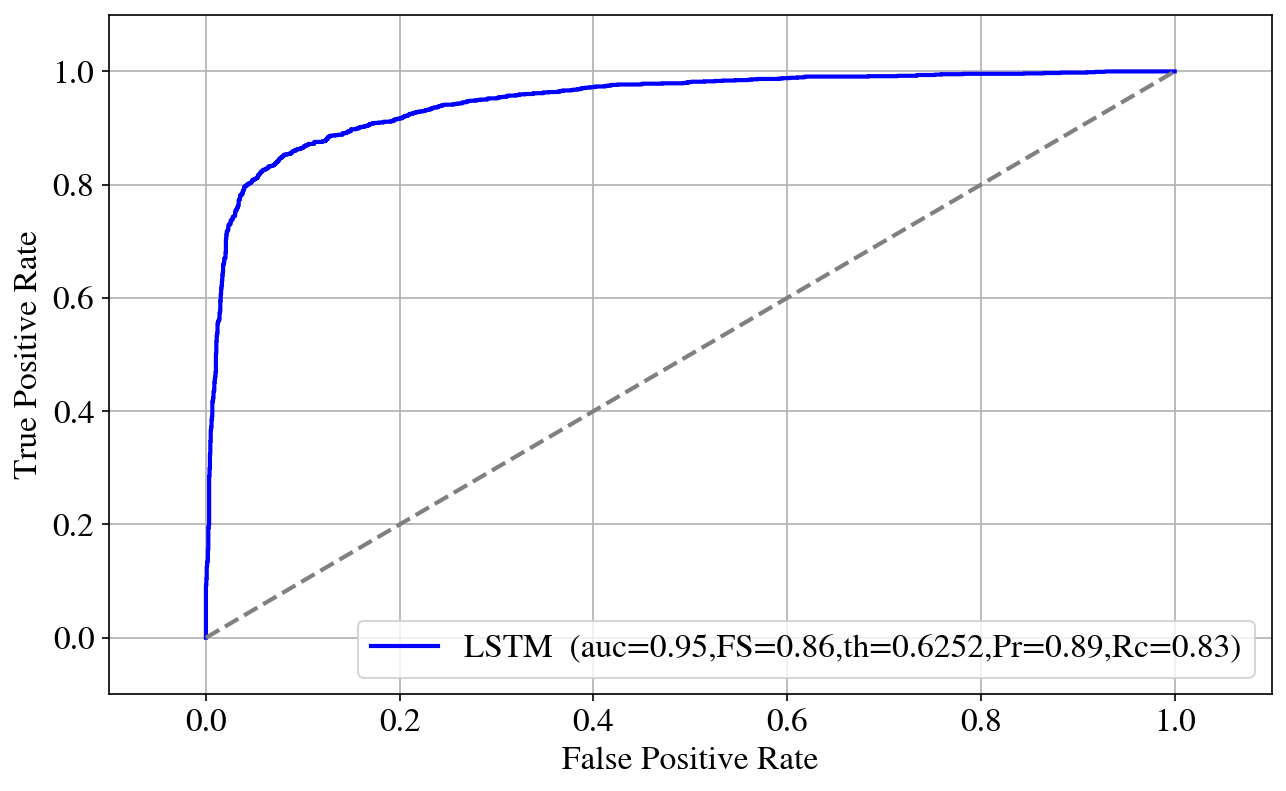

In [200]:
from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
import numpy

thresholdsOptimum4GScoreFromCF = {}
label='LSTM '

fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_prob)
precision, recall, thresholdsROC = precision_recall_curve(y_true, y_prob)
    
GScoresTemp = np.sqrt(precision*recall)
FScoresTemp = (2*precision*recall)/(precision + recall)
    
Fnan=FScoresTemp
FScoresTemp=FScoresTemp[~numpy.isnan(FScoresTemp)]

indexSelectedThreshold = np.argmax(FScoresTemp)
#thresholdsOptimum4GScoreFromCF[label] = thresholdsROC[indexSelectedThreshold]
GScoreMax = GScoresTemp[indexSelectedThreshold]
FScoreMax = FScoresTemp[indexSelectedThreshold]
thresholdsGScoreMax = thresholdsROC[indexSelectedThreshold]
precisionGScoreMax = precision[indexSelectedThreshold]
recallGScoreMax = recall[indexSelectedThreshold]
    

roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr,
             color='b',
             linestyle='-',
             label='%s (auc=%0.2f,FS=%0.2f,th=%0.4f,Pr=%0.2f,Rc=%0.2f)' % (label, roc_auc, FScoreMax, thresholdsGScoreMax, 
                                                                           precisionGScoreMax, recallGScoreMax))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

Confusion Matrix for LSTM with threshold 
0.6252431869506836


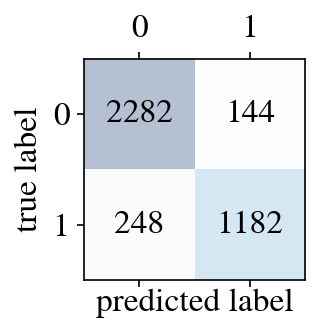

In [201]:

        
criticalThresholdGScoreMax =thresholdsGScoreMax
criticalThresholdGScoreMax = 1*criticalThresholdGScoreMax
       # criticalThresholdGScoreMax=0.4
print( "Confusion Matrix for " + label + "with threshold ")
print( criticalThresholdGScoreMax)

y_pred=y_prob.copy()

y_pred[y_pred>= criticalThresholdGScoreMax] = 1
y_pred[y_pred<criticalThresholdGScoreMax] = 0

confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()


In [202]:
# output the prediction results on test set, includes features, y_true, y_pred,y_probability
df_prediction=pd.DataFrame()
df_prediction['y_true']=y_true
df_prediction['y_pred']=y_pred
df_prediction['y_prob']=y_prob
df_prediction['y_pred'] = df_prediction['y_pred'].map(lambda x:int(x))

In [203]:
matrix=df_prediction
tp=len(matrix[(matrix.y_pred==1)&(matrix.y_true==1)])
tn=len(matrix[(matrix.y_pred==0)&(matrix.y_true==0)])
fp=len(matrix[(matrix.y_pred==1)&(matrix.y_true==0)])
fn=len(matrix[(matrix.y_pred==0)&(matrix.y_true==1)])
precision=float(tp)/(tp+fp)
recall=float(tp)/(tp+fn)
gscore=math.sqrt(precision*recall)
fscore=(2*precision*recall)/(precision + recall)



print ('precision=' + str(float("{0:.2f}".format(precision)))+ ', '+'recall=' + str(float("{0:.2f}".format(recall)))+', '+'fscore=' + str(float("{0:.2f}".format(fscore)))) 


precision=0.89, recall=0.83, fscore=0.86


# prediction on train set

366/1 - 0s


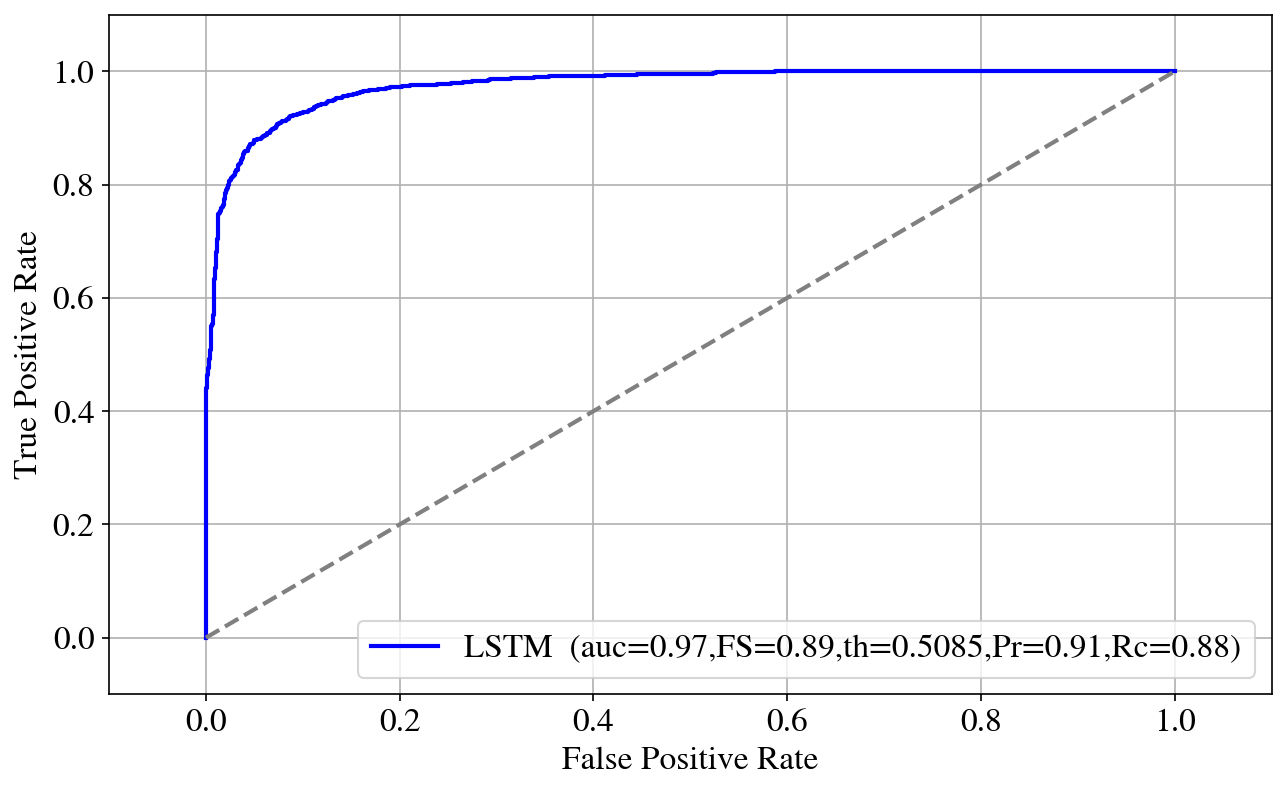

In [204]:
# on train set


x_input =X_train# x.reshape((1, 8, 103))
yhat = model.predict(x_input, verbose=2)

y_prob=yhat.flatten()
y_true=y_train.flatten()
        

from sklearn.metrics import roc_curve, auc, precision_recall_fscore_support
from sklearn.metrics import accuracy_score, precision_recall_curve
from sklearn.metrics import confusion_matrix
import numpy

thresholdsOptimum4GScoreFromCF = {}
label='LSTM '

fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_prob)
precision, recall, thresholdsROC = precision_recall_curve(y_true, y_prob)
    
GScoresTemp = np.sqrt(precision*recall)
FScoresTemp = (2*precision*recall)/(precision + recall)
    
Fnan=FScoresTemp
FScoresTemp=FScoresTemp[~numpy.isnan(FScoresTemp)]

indexSelectedThreshold = np.argmax(FScoresTemp)
#thresholdsOptimum4GScoreFromCF[label] = thresholdsROC[indexSelectedThreshold]
GScoreMax = GScoresTemp[indexSelectedThreshold]
FScoreMax = FScoresTemp[indexSelectedThreshold]
thresholdsGScoreMax = thresholdsROC[indexSelectedThreshold]
precisionGScoreMax = precision[indexSelectedThreshold]
recallGScoreMax = recall[indexSelectedThreshold]
    

roc_auc = auc(x=fpr, y=tpr)
plt.plot(fpr, tpr,
             color='b',
             linestyle='-',
             label='%s (auc=%0.2f,FS=%0.2f,th=%0.4f,Pr=%0.2f,Rc=%0.2f)' % (label, roc_auc, FScoreMax, thresholdsGScoreMax, 
                                                                           precisionGScoreMax, recallGScoreMax))

plt.legend(loc='lower right')
plt.plot([0, 1], [0, 1],
         linestyle='--',
         color='gray',
         linewidth=2)
plt.xlim([-0.1, 1.1])
plt.ylim([-0.1, 1.1])
plt.grid()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()
    
    
    
    
    
 

Confusion Matrix for LSTM with threshold 
0.6252431869506836


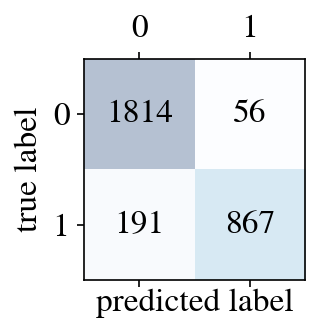

In [205]:
   
#criticalThresholdGScoreMax =thresholdsGScoreMax
#criticalThresholdGScoreMax = 1*criticalThresholdGScoreMax
       # criticalThresholdGScoreMax=0.4
print( "Confusion Matrix for " + label + "with threshold ")
print( criticalThresholdGScoreMax)

y_pred=y_prob.copy()

y_pred[y_pred>= criticalThresholdGScoreMax] = 1
y_pred[y_pred<criticalThresholdGScoreMax] = 0

confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.tight_layout()
# plt.savefig('./figures/confusion_matrix.png', dpi=300)
plt.show()

# prediction on all data set

In [206]:
# on test  set

x_input =X_test
y_input = y_test

yhat = model.predict(x_input, verbose=2)
y_prob=yhat.flatten()
y_pred=y_prob.copy()
y_pred[y_pred>= criticalThresholdGScoreMax] = 1
y_pred[y_pred<criticalThresholdGScoreMax] = 0
y_true=y_input.flatten()
y_pred_test=y_pred.copy()

# on train  set

x_input =X_train
y_input = y_train

yhat = model.predict(x_input, verbose=2)
y_prob=yhat.flatten()
y_pred=y_prob.copy()
y_pred[y_pred>= criticalThresholdGScoreMax] = 1
y_pred[y_pred<criticalThresholdGScoreMax] = 0
y_true=y_input.flatten()
y_pred_train=y_pred.copy()


482/1 - 0s
366/1 - 0s


In [207]:
test_df = pd.DataFrame({'trackingID':test_index, 'GI_pred':y_pred_test} ) 
test_df=pd.merge(test_df,
                 df.loc[:,['trackingID','GI','strain','ID','anti','conc']], on = 'trackingID', how='left')

train_df = pd.DataFrame({'trackingID':train_index, 'GI_pred':y_pred_train} ) 
train_df=pd.merge(train_df,
                 df.loc[:,['trackingID','GI','strain','ID','anti','conc']], on = 'trackingID', how='left')

train_df['data_type']='train'
test_df['data_type']='test'

In [208]:
df_notnormalized.columns[100:]

Index(['Rate_Area_Cy5vsCy4', 'Rate_Area_Cy6vsCy5', 'Rate_Area_Cy7vsCy6', 'Rate_Area_Cy8vsCy7', 'Rate_Area_Cy9vsCy8', 'Rate_BacCount_Cy3vsCy2', 'Rate_BacCount_Cy4vsCy3', 'Rate_BacCount_Cy5vsCy4', 'Rate_BacCount_Cy6vsCy5', 'Rate_BacCount_Cy7vsCy6', 'Rate_BacCount_Cy8vsCy7', 'Rate_BacCount_Cy9vsCy8', 'A.BAUMANNII', 'C.FREUNDII', 'E.AEROGENES', 'E.CLOACAE', 'E.COLI', 'K.OXYTOCA', 'K.PNEUMONIAE', 'P.AERUGINOSA', 'P.MIRABILIS', 'P.RETTGERI', 'P.VULGARIS', 'S.MARCESCENS', 'bug_type_A', 'bug_type_B'], dtype='object')

# prepare output

In [209]:
outputcolumns=['trackingID', 'GI', 'drugcode', 'Concentration', 'ID', 'strain', 'SampleID', 'anti',
               'AreaSUM_Cycle_2', 'AreaSUM_Cycle_3', 'AreaSUM_Cycle_4', 'AreaSUM_Cycle_5',
               'AreaSUM_Cycle_6', 'AreaSUM_Cycle_7', 'AreaSUM_Cycle_8', 'AreaSUM_Cycle_9',
               'BacCount_Cycle_2', 'BacCount_Cycle_3','BacCount_Cycle_4', 'BacCount_Cycle_5', 
               'BacCount_Cycle_6', 'BacCount_Cycle_7', 'BacCount_Cycle_8', 'BacCount_Cycle_9',
               'PerimMean_Cycle_2', 'PerimMean_Cycle_3', 'PerimMean_Cycle_4', 'PerimMean_Cycle_5']

In [210]:
df_prediction = pd.concat([test_df, train_df])

df_prediction=pd.merge(df_prediction.loc[:,['trackingID','GI_pred','data_type']],
                       df_notnormalized.loc[:,outputcolumns], on = 'trackingID', how='left')
df_prediction['false_positive']=np.where((df_prediction['GI']==0)&(df_prediction['GI_pred']==1),1,0)
df_prediction['false_negative']=np.where((df_prediction['GI']==1)&(df_prediction['GI_pred']==0),1,0)

outputpath  = 'C://Users//Shaghayegh.kazemlou//Shay//Danaher//Microbiology//Files//Output//'
#df_prediction.to_csv(outputpath+'LSTMpredictionTrainAndTest.csv',index=False)


In [211]:
df_prediction

,trackingID,GI_pred,data_type,GI,drugcode,Concentration,ID,strain,SampleID,anti,AreaSUM_Cycle_2,AreaSUM_Cycle_3,AreaSUM_Cycle_4,AreaSUM_Cycle_5,AreaSUM_Cycle_6,AreaSUM_Cycle_7,AreaSUM_Cycle_8,AreaSUM_Cycle_9,BacCount_Cycle_2,BacCount_Cycle_3,BacCount_Cycle_4,BacCount_Cycle_5,BacCount_Cycle_6,BacCount_Cycle_7,BacCount_Cycle_8,BacCount_Cycle_9,PerimMean_Cycle_2,PerimMean_Cycle_3,PerimMean_Cycle_4,PerimMean_Cycle_5,false_positive,false_negative
0,59983,1.0,test,1,CFPM,0.25,269,K.PNEUMONIAE,269M,CFPM,15214.622,21464.855,39116.153,45759.427,87992.498,136052.292,241546.114,379666.256,104,92,208,414,709,1044,1738,2907,41.588383,41.539818,50.122530,32.632768,0,0
1,59984,1.0,test,1,CFPM,0.50,269,K.PNEUMONIAE,269M,CFPM,14610.570,15371.843,19849.330,41494.041,98346.950,214507.091,410692.997,566920.644,289,223,187,266,481,981,2335,7282,38.129369,34.190796,32.241511,35.802238,0,0
2,59985,1.0,test,1,CFPM,1.00,269,K.PNEUMONIAE,269M,CFPM,15414.938,17350.521,18695.504,39882.791,78498.098,99146.074,115011.054,123462.666,163,167,194,142,281,361,386,414,35.465910,34.561684,30.568770,44.867256,0,0
3,59986,0.0,test,0,CFPM,2.00,269,K.PNEUMONIAE,269M,CFPM,8489.699,14027.579,15503.484,33010.057,56058.306,69674.640,73599.849,84939.372,84,77,155,149,214,207,199,158,30.286444,35.284405,29.942751,44.779957,0,0
4,59987,0.0,test,0,CFPM,4.00,269,K.PNEUMONIAE,269M,CFPM,14944.306,16820.029,16575.670,35907.839,55946.549,62944.381,65213.951,69263.650,255,176,172,158,159,163,183,214,34.896197,36.242186,27.389549,40.336793,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6779,75662,1.0,train,1,CFPM,2.00,BAA1705,K.PNEUMONIAE,16_BAA1705_B,CFPM,42737.528,14657.207,40077.162,122947.757,309813.578,546554.250,589754.927,593951.000,638,882,1567,3813,9270,25125,38936,46751,39.562320,24.725459,26.919281,34.887621,0,0
6780,75663,1.0,train,1,CFPM,4.00,BAA1705,K.PNEUMONIAE,16_BAA1705_B,CFPM,6826.802,13069.305,37673.583,113256.039,267200.580,503266.102,586094.000,592523.000,579,695,1034,2466,5255,16184,33590,42312,20.757692,24.924425,38.808582,66.531347,0,0
6781,75664,1.0,train,1,CFPM,8.00,BAA1705,K.PNEUMONIAE,16_BAA1705_B,CFPM,8683.711,15328.643,43674.108,114708.587,155726.708,164714.974,163909.780,160547.436,620,796,484,935,1270,1373,1195,1370,24.864478,26.285413,45.568441,124.274369,0,0
6782,75665,0.0,train,1,CFPM,16.00,BAA1705,K.PNEUMONIAE,16_BAA1705_B,CFPM,7647.119,13453.401,37225.924,108530.137,142400.004,148787.196,149804.885,140116.531,539,648,980,1303,1531,1876,2039,1908,25.864693,25.876172,46.256787,120.900506,0,1


## Prepare test and train sets for Random Forest model

In [212]:

# add bug drug to this cell
testsetLSTM = test_df.loc[:,['trackingID']].copy()#.reset_index().rename(columns={'index':'later_index'})
testsetLSTM.reset_index(drop=True, inplace=True)

trainsetLSTM = train_df.loc[:,['trackingID']].copy()#.reset_index().rename(columns={'index':'later_index'})
trainsetLSTM.reset_index(drop=True, inplace=True)


filepath = 'C://Users//Shaghayegh.kazemlou//Shay//Danaher//Microbiology//Files//'
#testsetLSTM.to_csv(filepath+'testsetLSTM.csv',header=None)
#trainsetLSTM.to_csv(filepath+'trainsetLSTM.csv',header=None)

# EA 

In [213]:
growthThresh = 0.5

In [214]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

import csv
import xlsxwriter
from tabulate import tabulate
import pandas as pd
from pprint import pprint

import seaborn as sn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc, RocCurveDisplay

from AST_Infer_Utils import *

In [215]:
#evaluation_df = pd.concat([test_df, train_df])
evaluation_df=test_df.copy()
#evaluation_df=train_df.copy()


In [216]:
resetInferDataDict()
yTruthAll = np.array([])
yPredAll = np.array([])
infoListAll=np.array([])


for index, row in evaluation_df.iterrows():
#    numFeatures = row[features]
    yTruth = row['GI']
    infoList = ['', 0, row['strain'], row['ID'], row['anti'], row['conc'], '0']
    
#    print(row['strain'])
    
    
    yPred = row['GI_pred']
    
    infoList = [infoList]
    
    yTruth = np.array(yTruth).reshape(1,1)
    yPred = np.array(yPred).reshape(1,1)

    
    
    if yTruthAll.size!=0:
        yTruthAll=np.concatenate([yTruthAll, yTruth], axis=0)
    else:
        yTruthAll=yTruth
    if yPredAll.size!=0:
        yPredAll=np.concatenate([yPredAll, yPred], axis=0)
    else:
        yPredAll=yPred
        
    if infoListAll.size!=0:
        infoListAll=np.concatenate([infoListAll, infoList], axis=0)
    else:
        infoListAll=np.array(infoList)

    addInferData(infoList, yTruth, yPred)
    
    
    
# not needed, this will be done in a later section
#groupCount, accAACount, accEACount, undetCount, strainSet, drugSet = compileAllInferData(growthThresh)


In [217]:
csvFileName = 'GramNeg_FullSample.csv'
# csvFileName = 'GramPos/GramPos_FullSample.csv'

dataDict = []
indMap = {}


with open(csvFileName, 'r') as csvFile:
    csvReader = csv.DictReader(csvFile)
    
    for n, line in enumerate(csvReader):            
        dataDict.append(line)
        indMap[int(line['Index'])] = n
        
dataDict[0]['data_type'] = ''
dataDict[0]['GI_pred'] = ''
        
print('totally %d valid examples' %len(dataDict))

totally 55613 valid examples


In [218]:
dataPath = 'C:/Users/Shaghayegh.kazemlou/Shay/Danaher/Microbiology/Files/Output/EA/'

predXLSXFileName = dataPath + 'LSTM-Model53-EA-CAZ-CFPM-Reduced%25train.xlsx'
workBook = xlsxwriter.Workbook(predXLSXFileName, {'strings_to_numbers': True, 'nan_inf_to_errors': True})

workSheet = workBook.add_worksheet('sample prediction')

workSheet.write_row(0, 0, dataDict[0].keys())
for n, row in enumerate(dataDict):
    workSheet.write_row(n+1, 0, row.values())

In [219]:
groupCount, accAACount, accEACount, undetCount, strainSet, drugSet = compileAllInferData(growthThresh)

groupCount = np.pad(groupCount, ((0,1),(0,1)), 'constant')
accAACount = np.pad(accAACount, ((0,1),(0,1)), 'constant')
accEACount = np.pad(accEACount, ((0,1),(0,1)), 'constant')
undetCount = np.pad(undetCount, ((0,1),(0,1)), 'constant')

In [220]:

yPredBinaryAll = (yPredAll > growthThresh)

sampCount = np.zeros((25, 25))
errCount = np.zeros((25, 25))

bias0Cent = 10
sampCountByBias = np.zeros(bias0Cent*2 + 1)
errCountByBias = np.zeros(bias0Cent*2 + 1)

for (yt, yp, info) in zip(yTruthAll, yPredBinaryAll, infoListAll):
    
    if info[4] not in drugSet:
        drugSet.append(info[4])

    colInd = drugSet.index(info[4])

    if info[2] not in strainSet:
        strainSet.append(info[2])

    rowInd = strainSet.index(info[2])
    
#   wellBias = int(info[6])
#   biasInd = wellBias + bias0Cent

    sampCount[rowInd, colInd] += 1
#    sampCountByBias[biasInd] += 1

    if yp != yt:   
        errCount[rowInd, colInd] += 1    
#        errCountByBias[biasInd] += 1
    
sampCount = sampCount[0:len(strainSet)+1, 0:len(drugSet)+1]
errCount = errCount[0:len(strainSet)+1, 0:len(drugSet)+1]

#biasEff = np.where(sampCountByBias > 0)
#biasLow = np.min(biasEff)
#biasHigh = np.max(biasEff)+1
#biasRange = np.arange(biasLow-bias0Cent, biasHigh-bias0Cent)
#bias0Cent -= biasLow
#sampCountByBias = sampCountByBias[biasLow:biasHigh]
#errCountByBias = errCountByBias[biasLow:biasHigh]

In [221]:
sampCount[:,-1] = np.sum(sampCount, axis=1)
sampCount[-1,:] = np.sum(sampCount, axis=0)
errCount[:,-1] = np.sum(errCount, axis=1)
errCount[-1,:] = np.sum(errCount, axis=0)
groupCount[:,-1] = np.sum(groupCount, axis=1)
groupCount[-1,:] = np.sum(groupCount, axis=0)
accAACount[:,-1] = np.sum(accAACount, axis=1)
accAACount[-1,:] = np.sum(accAACount, axis=0)
accEACount[:,-1] = np.sum(accEACount, axis=1)
accEACount[-1,:] = np.sum(accEACount, axis=0)
undetCount[:,-1] = np.sum(undetCount, axis=1)
undetCount[-1,:] = np.sum(undetCount, axis=0)

In [222]:
tableHeader = list([''] + drugSet)
tableDataCount = []
tableDataGroupCount = []
tableDataAcc = []
tableDataAccAA = []
tableDataAccEA = []
tableDataUndet = []

sampCount = sampCount.astype(int)
groupCount = groupCount.astype(int)
accRate = np.round((1 - errCount / sampCount) * 100, decimals=1)
accAARate = np.round((accAACount / groupCount) * 100, decimals=1)
accEARate = np.round((accEACount / groupCount) * 100, decimals=1)

for n, strain in enumerate(strainSet):
    tableDataCount.append([strainSet[n][0:6]] + list(sampCount[n]))
    tableDataGroupCount.append([strainSet[n][0:6]] + list(groupCount[n]))
    tableDataAcc.append([strainSet[n][0:6]] + list(accRate[n]))
    tableDataAccAA.append([strainSet[n][0:6]] + list(accAARate[n]))
    tableDataAccEA.append([strainSet[n][0:6]] + list(accEARate[n]))
    tableDataUndet.append([strainSet[n][0:6]] + list(undetCount[n]))

tableDataCount.append(['SUM'] + list(sampCount[-1,:]))
tableDataGroupCount.append(['SUM'] + list(groupCount[-1,:]))
tableDataAcc.append(['MEAN'] + list(accRate[-1,:]))
tableDataAccAA.append(['MEAN'] + list(accAARate[-1,:]))
tableDataAccEA.append(['MEAN'] + list(accEARate[-1,:]))
tableDataUndet.append(['SUM'] + list(undetCount[-1,:]))

sampCountTable = tabulate(tableDataCount, headers=tableHeader+['SUM'], tablefmt="pretty")
groupCountTable = tabulate(tableDataGroupCount, headers=tableHeader+['SUM'], tablefmt="pretty")
accRateTable = tabulate(tableDataAcc, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
accAARateTable = tabulate(tableDataAccAA, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
accEARateTable = tabulate(tableDataAccEA, headers=tableHeader+['MEAN'], tablefmt="pretty", floatfmt=".1f")
undetCountTable = tabulate(tableDataUndet, headers=tableHeader+['SUM'], tablefmt="pretty")

print('example count by species & drug groups')
print(sampCountTable)
print()
print('dilution group count by species & drug groups')
print(groupCountTable)
print()
print('G/I accuracy in % by species & drug groups')
print(accRateTable)
print()
print('AA accuracy in % by species & drug groups')
print(accAARateTable)
print()
print('EA accuracy in % by species & drug groups')
print(accEARateTable)
print()
print('undeter in % by species & drug groups')
print(undetCountTable)

# plt.figure(figsize=(12,8))
# sn.heatmap(accRate, annot=True, square=False)
# plt.title('accuracy in % by species & drug groups')

example count by species & drug groups
+--------+----+-----+------+----+------+-----+------+----+------+-----+------+----+------+
|        | GM | TOB | CPFX | AS | LVFX | IPM | MEPM | ST | CAZ  | CTX | CFPM | TP | SUM  |
+--------+----+-----+------+----+------+-----+------+----+------+-----+------+----+------+
| E.COLI | 0  |  0  |  0   | 0  |  0   |  0  |  0   | 0  | 304  |  0  | 288  | 0  | 592  |
| K.OXYT | 0  |  0  |  0   | 0  |  0   |  0  |  0   | 0  | 104  |  0  | 112  | 0  | 216  |
| S.MARC | 0  |  0  |  0   | 0  |  0   |  0  |  0   | 0  | 120  |  0  | 128  | 0  | 248  |
| P.VULG | 0  |  0  |  0   | 0  |  0   |  0  |  0   | 0  | 128  |  0  | 128  | 0  | 256  |
| A.BAUM | 0  |  0  |  0   | 0  |  0   |  0  |  0   | 0  | 128  |  0  | 176  | 0  | 304  |
| E.AERO | 0  |  0  |  0   | 0  |  0   |  0  |  0   | 0  |  96  |  0  |  72  | 0  | 168  |
| C.FREU | 0  |  0  |  0   | 0  |  0   |  0  |  0   | 0  | 104  |  0  | 120  | 0  | 224  |
| K.PNEU | 0  |  0  |  0   | 0  |  0   |  0  |  0  

In [223]:
workSheet = workBook.add_worksheet('sample count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataCount):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('dilution group count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataGroupCount):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAcc):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('AA accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAccAA):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('EA accuracy by group')

workSheet.write_row(0, 0, tableHeader+['MEAN'])
for n, row in enumerate(tableDataAccEA):
    workSheet.write_row(n+1, 0, row)
    
workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workSheet = workBook.add_worksheet('undertermined count by group')

workSheet.write_row(0, 0, tableHeader+['SUM'])
for n, row in enumerate(tableDataUndet):
    workSheet.write_row(n+1, 0, row)

workSheet.write_row(n+4, 0, ['drugs:']+drugSet)
workSheet.write_row(n+5, 0, ['species:']+strainSet)

workBook.close()